## ЛАБОРАТОРНАЯ РАБОТА №7.
## ТЕСТИРОВАНИЕ ГИПОТЕЗ О РАСПРЕДЛЕНИЯХ
#### по дисциплине «Математическая статистика»
Направление подготовки 01.03.02 Прикладная математика и информатика
Очной формы обучения

выполнил: студент группы Б9123-01.03.02ии

Иванов Матвей Олегович

принял: Деревягин Андрей Алексеевич

In [13]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.stattools import durbin_watson


with open("/home/matv864/it/AI_work/data/matstat_LR9_regressiya.txt") as f:
    s = f.read()
y_s = s.split(";")
X = np.arange(1, len(y_s)+1)
Y = np.asarray(y_s, dtype=float)
print(X)
print(Y)


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48
 49 50]
[18.01405235 15.91566308 15.81967373 16.46463288 15.5289257  12.173992
 13.64098464 12.12633958 11.80590277 11.99321926 11.43968782 12.49991563
 11.59110215 10.76803623 10.93584574 10.69805269 11.75507789  9.97413565
 10.4297814   9.21661247  7.48573767 10.67184017 10.87107671  9.25926933
 12.26980775  8.5455812  10.04432417  9.80617563 11.51455764 11.43063128
 10.08423922 10.26144882  8.93292034  7.75820471  9.28770949  9.66436646
 10.58392947 10.37231542  8.56703106  8.402053    7.36882627  6.67086044
  6.01603302  9.25987917  6.33907794  5.90055799  4.52346496  5.93655461
  2.87059628  3.53725972]


# Математическая часть

Уравнение регрессии Y на X выражается как:
$$Y(x)=E(Y|X=x)+\epsilon$$
где $\epsilon \sim N(0; \sigma^2)$ - случайный остаток
$$E(Y|X=x) = a_1x_1 + a_2x_2 + \cdots + a_mx_m = a^Tx$$
$$Y(x) = a^Tx+\epsilon$$
где $a$ минимизирует сумму квадратов отклонений
$$\widehat{a} = \argmin_{a} \sum_{i=1}^n{(a^TX^i-Y_i)^2}$$

### Проверка положения теоремы Гаусса-Маркова

In [14]:
def check_gauss_markov(model, X, flag=False):
    ostatki = model.resid

    stat_shapiro, p_shapiro = stats.shapiro(ostatki)
    if flag:
        print("1. Проверка нормальности остатков (тест Шапиро-Уилка):")
        print(f"   Статистика = {stat_shapiro:.3f}, p-значение = {p_shapiro:.3f}")
    normal_ok = p_shapiro > 0.05
    if flag:
        if normal_ok:
            print("Условие выполнено: остатки распределены нормально.")
        else:
            print("Условие не выполнено: остатки не нормальны.")

    dw_stat = durbin_watson(ostatki)
    autocorr_ok = 1.5 < dw_stat < 2.5
    if flag:
        print("\n2. Проверка автокорреляции (тест Дарбина-Уотсона):")
        print(f"   DW статистика = {dw_stat:.3f}")
        if autocorr_ok:
            print("Условие выполнено: автокорреляции нет.")
        else:
            print("Условие не выполнено: возможно, есть автокорреляция.")

    rank_X = np.linalg.matrix_rank(X)
    num_params = X.shape[1]
    if flag:
        print("\n3. Проверка ранга матрицы X:")
        print(f"   Ранг матрицы X = {rank_X}, количество параметров = {num_params}")
    rank_ok = (rank_X == num_params)
    if flag:
        if rank_ok:
            print("Условие выполнено: матрица имеет полный ранг.")
        else:
            print("Условие не выполнено: матрица не имеет полного ранга.")

    t_stat, p_value = stats.ttest_1samp(ostatki, 0)
    mean_ok = p_value > 0.05
    if flag:
        print("\n4. Проверка математического ожидания остатков:")
        print(f"   t-статистика = {t_stat}, p-значение = {p_value}")
        if mean_ok:
            print("Математическое ожидание остатков не отличается от нуля.")
        else:
            print("Математическое ожидание остатков значимо отлично от нуля.")

    try:
        bp_test = het_breuschpagan(ostatki, X)
        p_pagan = bp_test[1]
        heteroskedasticity_ok = p_pagan > 0.05
    except:
        heteroskedasticity_ok = True
        p_pagan = np.nan

    if flag:
        print("\n5. тест Бреуша–Пагана:")
        print(f"   p-значение = {p_pagan:.3f}")
        if heteroskedasticity_ok:
            print("дисперсия остатков постоянна")
        else:
            print("!!! дисперсия остатков постоянна")
    all_ok = normal_ok and autocorr_ok and rank_ok and mean_ok and heteroskedasticity_ok
    if flag:
        print()
        if all_ok:
            print("Все 5 условий теоремы Гаусса-Маркова выполнены.")
        else:
            print("Не все условия теоремы Гаусса-Маркова выполнены.")

    return {
        'normal': normal_ok,
        'autocorrelation': autocorr_ok,
        'rank': rank_ok,
        'zero_mean': mean_ok,
        'homoskedasticity': heteroskedasticity_ok,
        'all_ok': all_ok
    }

# Задания

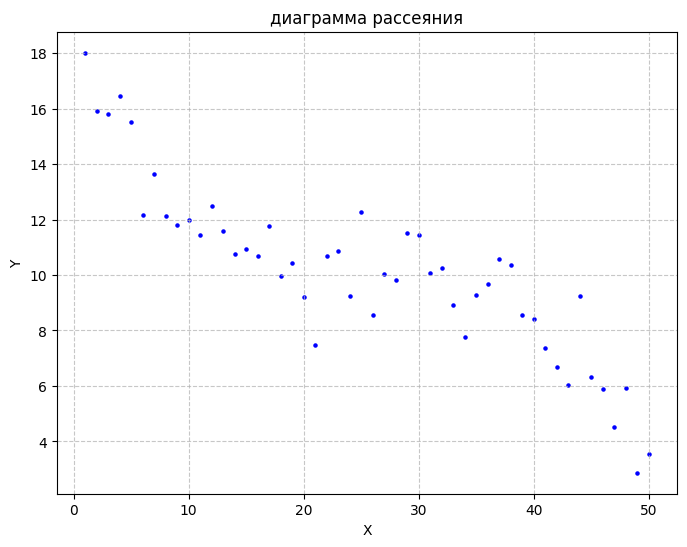

In [15]:
# № 2
# Построить диаграмму рассеяния.

plt.figure(figsize=(8, 6))
plt.scatter(X, Y, color='blue', s=5)

# Подписи осей и заголовок
plt.xlabel('X')
plt.ylabel('Y')
plt.title('диаграмма рассеяния')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [16]:
# № 3
# Построить модель линейной регрессии с помощью statsmodels.api.OLS взяв в качестве условного матожидания линейную функцию
# Для модели вида Y=aX+b необходимо добавить столбец единиц:
X_with_const = sm.add_constant(X)
model = sm.OLS(Y, X_with_const)
results = model.fit()
a = results.params[1]
b = results.params[0]
print(f"Уравнение регрессии: Y = {a:.2f} * X + {b:.2f}")
print(f"коэффициент детерминации: R^2 = {results.rsquared}")
results.summary()



Уравнение регрессии: Y = -0.19 * X + 14.94
коэффициент детерминации: R^2 = 0.7570443680073584


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     149.6
Date:                Sat, 24 May 2025   Prob (F-statistic):           2.34e-16
Time:                        19:47:20   Log-Likelihood:                -92.445
No. Observations:                  50   AIC:                             188.9
Df Residuals:                      48   BIC:                             192.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         14.9354      0.450     33.154      0.000      14.030      15.841
x1            -0.1880      0.015    -12.230      0.000      -0.219      -0.157
==============================================================================
Omnibus:                        1.246   Durbin-Watson:                   0.993
Prob(Omnibus):                  0.536   Jarque-Bera (JB):                1.067
Skew:                           0.146   Prob(JB):                        0.587
Kurtosis:                       2.347   Cond. No.                         59.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

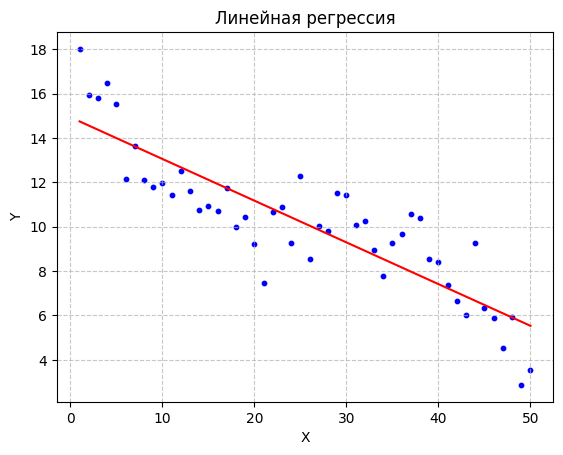

In [17]:
# № 4
# На диаграмму рассеяния добавить линию регрессии
Y_linear_predicted = a * X + b
plt.scatter(X, Y, color='blue', s=10)
plt.plot(X, Y_linear_predicted, color="red")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Линейная регрессия')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [ ]:
# № 5
# Оценить значимость коэффициентов. Проверить положения теоремы Гаусса-Маркова. 

'''
Коэффициент x1 (наклон):
    P-value = 0.019 < 0.05 (значимо)
    Вывод: Переменная X значимо влияет на Y.
Константа (intercept):
    P-value = 0.138 > 0.05 (незначимо)
    Вывод: Модель может проходить через ноль
'''

check_gauss_markov(results, X_with_const, True)


[9.69884651e-35 2.34098285e-16]
1. Проверка нормальности остатков (тест Шапиро-Уилка):
   Статистика = 0.974, p-значение = 0.329
Условие выполнено: остатки распределены нормально.

2. Проверка автокорреляции (тест Дарбина-Уотсона):
   DW статистика = 0.993
Условие не выполнено: возможно, есть автокорреляция.

3. Проверка ранга матрицы X:
   Ранг матрицы X = 2, количество параметров = 2
Условие выполнено: матрица имеет полный ранг.

4. Проверка математического ожидания остатков:
   t-статистика = -7.765543018032097e-15, p-значение = 0.9999999999999938
Математическое ожидание остатков не отличается от нуля.

5. тест Бреуша–Пагана:
   p-значение = 0.768
дисперсия остатков постоянна

Не все условия теоремы Гаусса-Маркова выполнены.


{'normal': np.True_,
 'autocorrelation': np.False_,
 'rank': np.True_,
 'zero_mean': np.True_,
 'homoskedasticity': np.True_,
 'all_ok': np.False_}

In [19]:
# № 6
# Подобрать нелинейную функцию вместо линейной и проделать тоже самое. 


In [20]:
# квадратичная регрессия
X_quad = sm.add_constant(np.column_stack((X, X**2)))
model_quad = sm.OLS(Y, X_quad)
results_quad = model_quad.fit()
b0, b1, b2 = results_quad.params
print(f"Уравнение регрессии: Y = {b2:.3f}*X^2 + {b1:.3f}*X + {b0:.3f}")
print(f"коэффициент детерминации: R^2 = {results_quad.rsquared}")
Y_quad_predicted = b2 * X * X + b1 * X + b0
results_quad.summary()


Уравнение регрессии: Y = 0.000*X^2 + -0.208*X + 15.105
коэффициент детерминации: R^2 = 0.757569548692516


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.758
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     73.44
Date:                Sat, 24 May 2025   Prob (F-statistic):           3.45e-15
Time:                        19:47:21   Log-Likelihood:                -92.391
No. Observations:                  50   AIC:                             190.8
Df Residuals:                      47   BIC:                             196.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.1051      0.700     21.587      0.000      13.697      16.513
x1            -0.2076      0.063     -3.280      0.002      -0.335      -0.080
x2             0.0004      0.001      0.319      0.751      -0.002       0.003
==============================================================================
Omnibus:                        1.390   Durbin-Watson:                   0.995
Prob(Omnibus):                  0.499   Jarque-Bera (JB):                1.098
Skew:                           0.115   Prob(JB):                        0.578
Kurtosis:                       2.312   Cond. No.                     3.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# гиперболическая регрессия
X_hyper = sm.add_constant(1 / X)
model_hyper = sm.OLS(Y, X_hyper)
results_hyper = model_hyper.fit()
a, b = results_hyper.params
print(f"Уравнение регрессии: Y = {b:.3f}/X + {a:.3f}")
print(f"коэффициент детерминации: R^2 = {results_hyper.rsquared}")
Y_hyper_predicted = b / X + a
results_hyper.summary()


Уравнение регрессии: Y = 13.306/X + 8.943
коэффициент детерминации: R^2 = 0.4442845343578149


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.444
Model:                            OLS   Adj. R-squared:                  0.433
Method:                 Least Squares   F-statistic:                     38.38
Date:                Sat, 24 May 2025   Prob (F-statistic):           1.26e-07
Time:                        19:47:21   Log-Likelihood:                -113.13
No. Observations:                  50   AIC:                             230.3
Df Residuals:                      48   BIC:                             234.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.9432      0.387     23.095      0.000       8.165       9.722
x1            13.3061      2.148      6.195      0.000       8.987      17.625
==============================================================================
Omnibus:                        6.687   Durbin-Watson:                   0.522
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                5.963
Skew:                          -0.833   Prob(JB):                       0.0507
Kurtosis:                       3.291   Cond. No.                         6.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

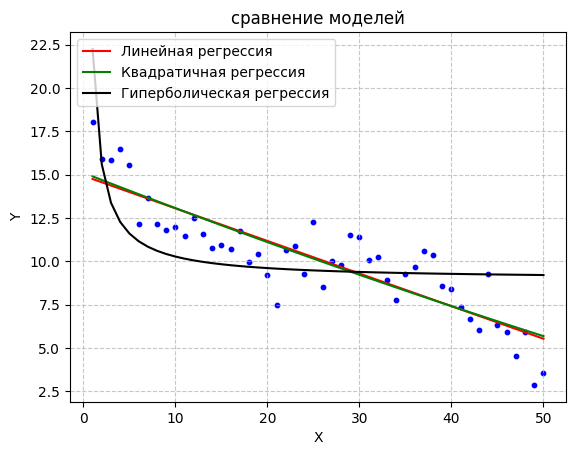

In [22]:
plt.scatter(X, Y, color='blue', s=10)
plt.plot(X, Y_linear_predicted, color="red", label="Линейная регрессия")
plt.plot(X, Y_quad_predicted, color="green", label="Квадратичная регрессия")
plt.plot(X, Y_hyper_predicted, color="black", label="Гиперболическая регрессия")
plt.xlabel('X')
plt.ylabel('Y')
plt.title('сравнение моделей')
plt.legend(loc='upper left')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

(исходя из коэффициента детерминации) квадратичная регрессия показала себя лучше всего

Все обновления и историю изменений можно посмотреть по ссылке в моём репозитории \
https://github.com/matv864/AI_work/tree/main/matstat